In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler  
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [215]:
# Store csv file in a Pandas DataFrame
df = pd.read_csv('combined_labled_k6.csv')
df.head()

,samples,joint_effort[0],joint_effort[1],joint_effort[2],joint_effort[3],joint_effort[4],joint_effort[5],cluster
0,0,1.050352,0.036084,0.153670,-0.208722,-0.226335,0.071900,0
1,1,1.040706,0.052485,0.160204,-0.204533,-0.222889,0.070273,0
2,2,1.070528,0.033901,0.198342,-0.208156,-0.228432,0.070408,0
3,3,1.078726,0.032952,0.203791,-0.208763,-0.228608,0.071877,0
4,4,1.046257,0.048101,0.215115,-0.205263,-0.223011,0.071184,0


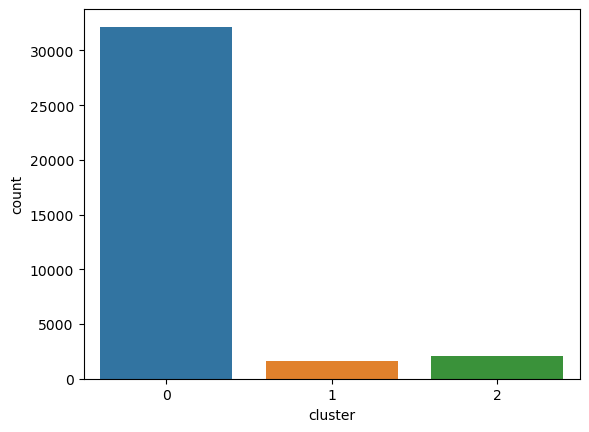

In [216]:
sns.countplot(x = 'cluster', data=df)

In [217]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, -1]
X=np.array(X)
y= np.array(y)

In [218]:
X

array([[ 1.05035197,  0.03608361,  0.15366994, -0.20872176, -0.22633529,
         0.07190013],
       [ 1.04070593,  0.05248472,  0.16020391, -0.20453307, -0.22288895,
         0.07027318],
       [ 1.07052848,  0.03390063,  0.19834174, -0.20815593, -0.22843161,
         0.07040757],
       ...,
       [ 2.18775072,  0.72399379, -0.04694298, -0.1240152 , -0.3555519 ,
        -0.3742596 ],
       [ 2.17323085,  0.76483473, -0.16630029, -0.11638658, -0.3595942 ,
        -0.37862044],
       [ 2.21371423,  0.70888995, -0.01968097, -0.12413878, -0.36091259,
        -0.37732746]])

In [219]:
y=y.reshape(-1,1)
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [220]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=None,shuffle=False)

In [221]:
scaler = MinMaxScaler()
X1= scaler.fit_transform(X)
x1 = scaler.transform(X1)

print(X1.shape)




(35838, 6)


In [222]:
sc = MinMaxScaler()

y1= sc.fit_transform(y.reshape(-1,1))
#y1 = sc.transform(y1)


print(y1.shape)


(35838, 1)


In [223]:
print(X1)

[[0.31531986 0.62765369 0.75464588 0.45017587 0.63641474 0.64530948]
 [0.31253532 0.62962466 0.75810344 0.45373317 0.64053097 0.64348093]
 [0.32114426 0.62739136 0.77828475 0.45065642 0.63391094 0.64363198]
 ...
 [0.64365528 0.71032188 0.64848798 0.52211411 0.48208143 0.1438633 ]
 [0.6394638  0.71522986 0.58532794 0.52859282 0.47725339 0.13896208]
 [0.65115023 0.70850681 0.66291416 0.52200916 0.47567873 0.14041528]]


In [224]:
print(max(y1))

[1.]


In [225]:
## train dataclass TrainData(Dataset):
#from http.client import _DataType


class TrainData(Dataset):   
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        self.window=5
        
    def __getitem__(self, index):
        if index>= self.length-self.window:
            X=self.X_data[index:index+self.window,]
            Y=self.y_data[index,]
        else:
            X=self.X_data[index:index+self.window,]  
            Y=self.y_data[index+self.window,]
        
        return X,Y
        
    def __len__ (self):
        Q = len(self.X_data)
        self.length=Q-self.window+1
        return self.length

# train_data = TrainData(torch.FloatTensor(X_train), 
#                        torch.FloatTensor(y_train))

## test data  
# class TestData(Dataset):
    
#     def __init__(self, X_data,y_data):
#         self.X_data = X_data
#         self.y_data = y_data
#         self.window=5
#     def __getitem__(self, index):
#         if index>= self.length-self.window:
#             X=self.X_data[index:index+self.window]
#             Y=self.y_data[index,]

#         else:
#             X=self.X_data[index:index+self.window]  
#             Y=self.y_data[index+self.window,]
        
#         return X,Y
#     def __len__ (self):
#         Q = len(self.X_data)
#         self.length=Q-self.window+1
#         return self.length
    

#test_data = TrainData(torch.FloatTensor(X_test),torch.FloatTensor(y_test))                      

In [226]:
cs=TrainData(torch.FloatTensor(X1),torch.FloatTensor(y1))
train_l=round(int(cs.__len__())*0.8)

batch_size=25
val_l=int(cs.__len__())-train_l

train_set, val_set = torch.utils.data.random_split(cs, [train_l, val_l])

train_loader = DataLoader(train_set, shuffle=True, batch_size=batch_size, drop_last=True)


for each_x, each_y in train_loader:
    print(each_x.shape)
    print(each_y.shape)
    print(type(each_x))
    print(type(each_y))
    break
    
    
val_loader = DataLoader(val_set, shuffle=True, batch_size=batch_size, drop_last=True)
for each_x, each_y in val_loader:
    print(each_x.shape)
    print(each_y.shape)
    print(type(each_x))
    print(type(each_y))
    break

torch.Size([25, 5, 6])
torch.Size([25, 1])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
torch.Size([25, 5, 6])
torch.Size([25, 1])
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [227]:



# batch_size=25

# train_loader = DataLoader(dataset=train_data, shuffle=True, batch_size=batch_size, drop_last=True)


# val_loader = DataLoader(dataset=test_data, shuffle=True, batch_size=batch_size, drop_last=True)
# print(next(iter(train_loader))[0].shape[0])
# #print(train_loader.batch_size)
# for each_x, each_y in train_loader:
#     print(each_x.shape)
#     print(each_y.shape)
#     break
    
    

# for each_x,each_y in val_loader:
#     print(each_x.shape)
#     print(each_y.shape)
#     break

In [228]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [229]:
class GRUNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(GRUNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        #print(x,h)
        out, h = self.gru(x, h)
        out = self.fc(self.relu(out[:,-1]))
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device)
        return hidden
class LSTMNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, n_layers, drop_prob=0.2):
        super(LSTMNet, self).__init__()
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, n_layers, batch_first=True, dropout=drop_prob)
        self.fc = nn.Linear(hidden_dim, output_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x, h):
        out, h = self.lstm(x, h)
        out = self.fc(self.relu(out[:,-1]))
        return out, h
    
    def init_hidden(self, batch_size):
        weight = next(self.parameters()).data
        hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().to(device))
        return hidden

In [230]:

def train(train_loader, learn_rate, hidden_dim=256, EPOCHS=5, model_type="GRU"):
    print(next(iter(train_loader))[0].shape[2])
    # Setting common hyperparameters
    input_dim = next(iter(train_loader))[0].shape[2]
    output_dim = 1
    n_layers = 2
    # Instantiating the models
    if model_type == "GRU":
        model = GRUNet(input_dim, hidden_dim, output_dim, n_layers)
    else:
        model = LSTMNet(input_dim, hidden_dim, output_dim, n_layers)
    model.to(device)
    
    # Defining loss function and optimizer
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    
    model.train()
    print("Starting Training of {} model".format(model_type))
    epoch_times = []
    # Start training loop
    for epoch in range(1,EPOCHS+1):
        start_time = time.time()
        h = model.init_hidden(batch_size)
        avg_loss = 0.
        counter = 0
        for x, label in train_loader:
            counter += 1
            if model_type == "GRU":
                h = h.data
            else:
                h = tuple([e.data for e in h])
            model.zero_grad()
            
            out, h = model(x.to(device), h)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
            if counter%200 == 0:
                print("Epoch {}......Step: {}/{}....... Average Loss for Epoch: {}".format(epoch, counter, len(train_loader), avg_loss/counter))
        current_time = time.time()
        print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, avg_loss/len(train_loader)))
        print("Total Time Elapsed: {} seconds".format(str(current_time-start_time)))
        epoch_times.append(current_time-start_time)
    print("Total Training Time: {} seconds".format(str(sum(epoch_times))))
    return model


In [236]:
def evaluate(model, val_loader, label_scalers):
    model.eval()
    outputs = []
    targets = []
    start_time = time.time()
    for each_x,each_y in val_loader:
        inp = (each_x.to(device))
        labs = (each_y.to(device))
        h = model.init_hidden(inp.shape[0])
        # print(inp.size)
        out, h = model(inp, h)
        outputs.extend(out.cpu().detach().numpy().reshape(1, -1)[0])
        targets.extend(each_y.cpu().numpy().reshape(1, -1)[0])
    print("Evaluation Time: {}".format(str(time.time()-start_time)))
    
    return outputs, targets

In [237]:
lr = 0.001
gru_model = train(train_loader, lr, model_type="GRU")
#Lstm_model = train(train_loader, lr, model_type="LSTM")

6
Starting Training of GRU model
Epoch 1......Step: 200/1146....... Average Loss for Epoch: 0.05686163354315795
Epoch 1......Step: 400/1146....... Average Loss for Epoch: 0.061277913403318965
Epoch 1......Step: 600/1146....... Average Loss for Epoch: 0.0597326705334126
Epoch 1......Step: 800/1146....... Average Loss for Epoch: 0.05687351892331208
Epoch 1......Step: 1000/1146....... Average Loss for Epoch: 0.05213702760118758
Epoch 1/5 Done, Total Loss: 0.049597450186023864
Total Time Elapsed: 1.7991926670074463 seconds
Epoch 2......Step: 200/1146....... Average Loss for Epoch: 0.02813593690574635
Epoch 2......Step: 400/1146....... Average Loss for Epoch: 0.028833232758770463
Epoch 2......Step: 600/1146....... Average Loss for Epoch: 0.027675018563556173
Epoch 2......Step: 800/1146....... Average Loss for Epoch: 0.027049499471759192
Epoch 2......Step: 1000/1146....... Average Loss for Epoch: 0.027190137467812747
Epoch 2/5 Done, Total Loss: 0.027167436306087103
Total Time Elapsed: 1.7963

In [238]:
gru_outputs, targets = evaluate(gru_model, val_loader, label_scalers=y_te)



Evaluation Time: 0.12534499168395996


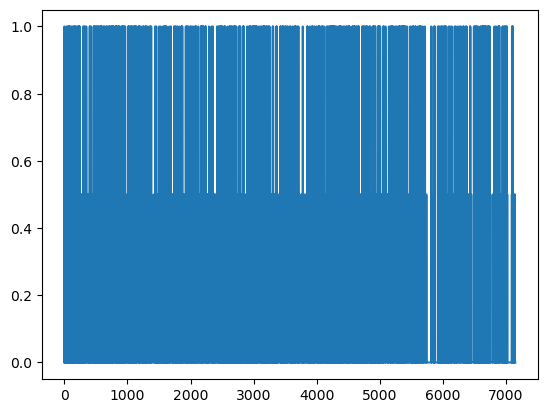

In [239]:
plt.plot( targets)

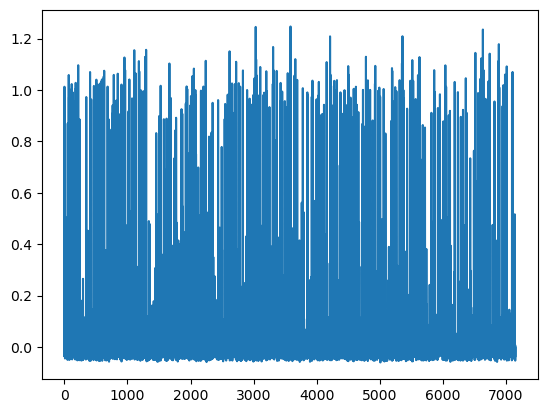

In [240]:
plt.plot(gru_outputs)